In [1]:
#%matplotlib notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

import os
import os.path as path
import wget

In [2]:
if not path.exists('Data'):
    os.mkdir('Data')
    
!rm Data/*

file = 'Data/Minimos.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosLineal.txt'
#url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosCuadratico.txt'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

rm: no se puede borrar 'Data/*': No existe el archivo o el directorio
100% [..................................................................................] 522 / 522File loaded


In [3]:
data = np.loadtxt(Path_)
x = data[:,0]
y = data[:,1]

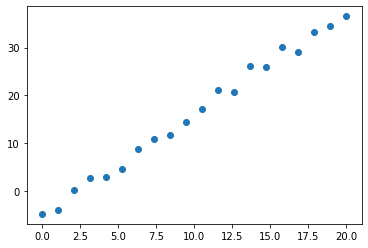

In [6]:
plt.scatter(x,y)

In [11]:
def GetFit(x,y,n=1):
    
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
    
    print(A)

In [12]:
GetFit(x,y)

[[ 1.        0.      ]
 [ 1.        1.052632]
 [ 1.        2.105263]
 [ 1.        3.157895]
 [ 1.        4.210526]
 [ 1.        5.263158]
 [ 1.        6.315789]
 [ 1.        7.368421]
 [ 1.        8.421053]
 [ 1.        9.473684]
 [ 1.       10.52632 ]
 [ 1.       11.57895 ]
 [ 1.       12.63158 ]
 [ 1.       13.68421 ]
 [ 1.       14.73684 ]
 [ 1.       15.78947 ]
 [ 1.       16.84211 ]
 [ 1.       17.89474 ]
 [ 1.       18.94737 ]
 [ 1.       20.      ]]
